# Tabular Playground Competition from Kaggle - Choosing a Regression Algorithm.

## Introduction

Hello Kagglers!

In this notebook I will try to find out which of the regression algorithms can improve the score  for this particular dataset and position in Kaggle competition. I found this competition challenging as this dataset is a bit tricky and I think there isn't too much to improve as the dataset has been preprocessed for us (correct me if I'm wrong). The only thing which comes to my mind is to choose the right algorithm and find the right hyperparametres.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
sample_sub = pd.read_csv('sample_submission.csv')

In [4]:
train_df = pd.read_csv('train.csv')
train_df

id     cont1     cont2     cont3     cont4     cont5     cont6  \
0            1  0.670390  0.811300  0.643968  0.291791  0.284117  0.855953   
1            3  0.388053  0.621104  0.686102  0.501149  0.643790  0.449805   
2            4  0.834950  0.227436  0.301584  0.293408  0.606839  0.829175   
3            5  0.820708  0.160155  0.546887  0.726104  0.282444  0.785108   
4            8  0.935278  0.421235  0.303801  0.880214  0.665610  0.830131   
...        ...       ...       ...       ...       ...       ...       ...   
299995  499995  0.216974  0.735265  0.648648  0.255387  0.616353  0.345197   
299996  499996  0.545799  0.165139  0.220966  0.190053  0.359362  0.386336   
299997  499997  0.284401  0.841542  0.957585  0.340383  0.396279  0.330376   
299998  499998  0.481900  0.622346  0.540032  0.823118  0.283066  0.434283   
299999  499999  0.486632  0.230090  0.543587  0.263878  0.279118  0.636295   

           cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
0       0.890700  0.285542  0.558245  0.779418  0.921832  0.866772  0.878733   
1       0.510824  0.580748  0.418335  0.432632  0.439872  0.434971  0.369957   
2       0.506143  0.558771  0.587603  0.823312  0.567007  0.677708  0.882938   
3       0.752758  0.823267  0.574466  0.580843  0.769594  0.818143  0.914281   
4       0.487113  0.604157  0.874658  0.863427  0.983575  0.900464  0.935918   
...          ...       ...       ...       ...       ...       ...       ...   
299995  0.295718  0.304357  0.314351  0.860504  0.315397  0.247682  0.486542   
299996  0.365767  0.344217  0.466446  0.454581  0.360251  0.360755  0.292535   
299997  0.525687  0.260039  0.378174  0.526925  0.491735  0.516629  0.173521   
299998  0.174342  0.710843  0.358690  0.648272  0.984647  1.001110  0.063956   
299999  0.472391  0.339654  0.444787  0.636765  0.782196  0.559692  0.762954   

          cont14    target  
0       0.305411  7.243043  
1       0.369484  8.203331  
2       0.303047  7.776091  
3       0.279528  6.957716  
4       0.435772  7.951046  
...          ...       ...  
299995  0.288750  7.385215  
299996  0.619984  7.242617  
299997  0.714552  9.592487  
299998  0.377693  8.207951  
299999  0.215539  8.890285  

[300000 rows x 16 columns]

In [5]:
test_df = pd.read_csv("test.csv")
test_df

id     cont1     cont2     cont3     cont4     cont5     cont6  \
0            0  0.353600  0.738780  0.600939  0.293377  0.285691  0.458006   
1            2  0.907222  0.189756  0.215531  0.869915  0.301333  0.528958   
2            6  0.179287  0.355353  0.623972  0.437812  0.282476  0.320826   
3            7  0.359385  0.181049  0.551368  0.206386  0.280763  0.482076   
4           10  0.335791  0.682607  0.676481  0.219465  0.282861  0.581721   
...        ...       ...       ...       ...       ...       ...       ...   
199995  499984  0.353856  0.677578  0.550852  0.869612  0.957635  0.255054   
199996  499985  0.243209  0.135627  0.218393  0.792798  0.547639  0.433520   
199997  499987  0.506973  0.683893  0.533434  0.192957  0.314381  0.358604   
199998  499988  0.347870  0.553112  0.495284  0.861500  0.816914  0.298478   
199999  499990  0.688188  0.358328  0.644511  0.766354  0.747591  0.727329   

           cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
0       0.620704  0.422249  0.369203  0.435727  0.550540  0.699134  0.286864   
1       0.390351  0.521112  0.794779  0.798580  0.446475  0.449037  0.916964   
2       0.386789  0.776422  0.222268  0.229102  0.211913  0.222651  0.327164   
3       0.506677  0.362793  0.379737  0.345686  0.445276  0.518485  0.299028   
4       0.748639  0.350158  0.448915  0.506878  0.817721  0.805895  0.790591   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.289138  0.635979  0.271399  0.282455  0.217169  0.219088  0.373261   
199996  0.549540  0.650107  0.453787  0.459689  0.450424  0.511176  0.318334   
199997  0.554455  0.267105  0.396101  0.445390  0.382656  0.397978  0.381235   
199998  0.275964  0.265841  0.334250  0.252635  0.213589  0.285223  0.336772   
199999  0.468329  0.576711  0.453124  0.381600  0.299126  0.499627  0.691078   

          cont14  
0       0.364515  
1       0.513002  
2       0.827941  
3       0.598166  
4       0.249275  
...          ...  
199995  0.272479  
199996  0.395747  
199997  0.369464  
199998  0.388505  
199999  0.668109  

[200000 rows x 15 columns]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [8]:
train_df.describe().T

count           mean            std       min            25%  \
id      300000.0  249825.145857  144476.732562  1.000000  124656.500000   
cont1   300000.0       0.506873       0.203976 -0.082263       0.343078   
cont2   300000.0       0.497898       0.228159 -0.031397       0.319170   
cont3   300000.0       0.521557       0.200770  0.020967       0.344096   
cont4   300000.0       0.515683       0.233035  0.152761       0.294935   
cont5   300000.0       0.502022       0.220701  0.276377       0.284108   
cont6   300000.0       0.526515       0.217909  0.066166       0.356163   
cont7   300000.0       0.487890       0.181096 -0.097666       0.346600   
cont8   300000.0       0.525163       0.216221  0.217260       0.341486   
cont9   300000.0       0.459857       0.196685 -0.240604       0.330832   
cont10  300000.0       0.520532       0.201854 -0.085046       0.375465   
cont11  300000.0       0.483926       0.220082  0.083277       0.300474   
cont12  300000.0       0.506877       0.218947  0.088635       0.310166   
cont13  300000.0       0.553442       0.229730  0.029950       0.350472   
cont14  300000.0       0.503713       0.208238  0.166367       0.308673   
target  300000.0       7.905661       0.733071  0.000000       7.329367   

                  50%            75%            max  
id      249738.500000  374836.250000  499999.000000  
cont1        0.484005       0.643789       1.016227  
cont2        0.553209       0.731263       0.859697  
cont3        0.551471       0.648315       1.006955  
cont4        0.482880       0.748705       1.010402  
cont5        0.451733       0.670660       1.034261  
cont6        0.470988       0.694043       1.043858  
cont7        0.466825       0.581292       1.066167  
cont8        0.483460       0.685250       1.024427  
cont9        0.416843       0.575041       1.004114  
cont10       0.458877       0.700292       1.199951  
cont11       0.441916       0.679128       1.022620  
cont12       0.486599       0.694453       1.049025  
cont13       0.487707       0.768479       0.977845  
cont14       0.431845       0.712653       0.868506  
target       7.940571       8.470084      10.267569

#### Take a sample of a dataset

In [9]:
train_df = train_df.sample(frac=0.4)

### Outliers

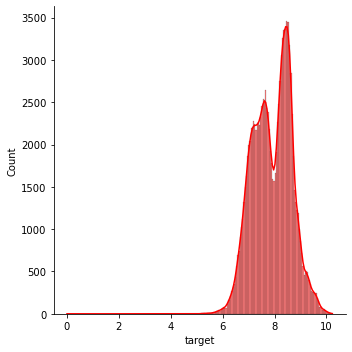

In [10]:
sns.displot(data=train_df['target'], kde=True, color='r')

<AxesSubplot:xlabel='target'>

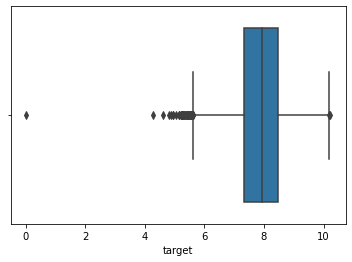

In [11]:
sns.boxplot(x=train_df['target'])

In [12]:
ser = pd.Series(train_df['target'])
ser.describe()

count    120000.000000
mean          7.906703
std           0.734141
min           0.000000
25%           7.330572
50%           7.941610
75%           8.471955
max          10.227541
Name: target, dtype: float64

In [13]:
q1 = np.quantile(train_df['target'],0.25)
q3 = np.quantile(train_df['target'],0.75)

iqr = q3-q1

lower_outlier = q1 - (1.5*iqr)
upper_outlier = q3 + (1.5*iqr)

In [14]:
train_df_without_outliers = train_df[train_df['target'] >= lower_outlier].copy()

In [15]:
len(train_df_without_outliers)

119935

<AxesSubplot:xlabel='target'>

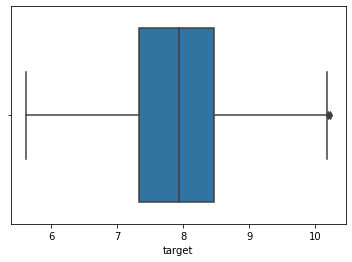

In [16]:
sns.boxplot(x=train_df_without_outliers['target'])

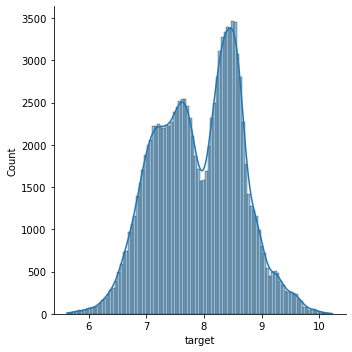

In [17]:
sns.displot(data=train_df_without_outliers['target'], kde=True)

Usually, at this point we would think about whether to drop outliers, but I did it already and it had no effect on results.

### Correlation

<AxesSubplot:>

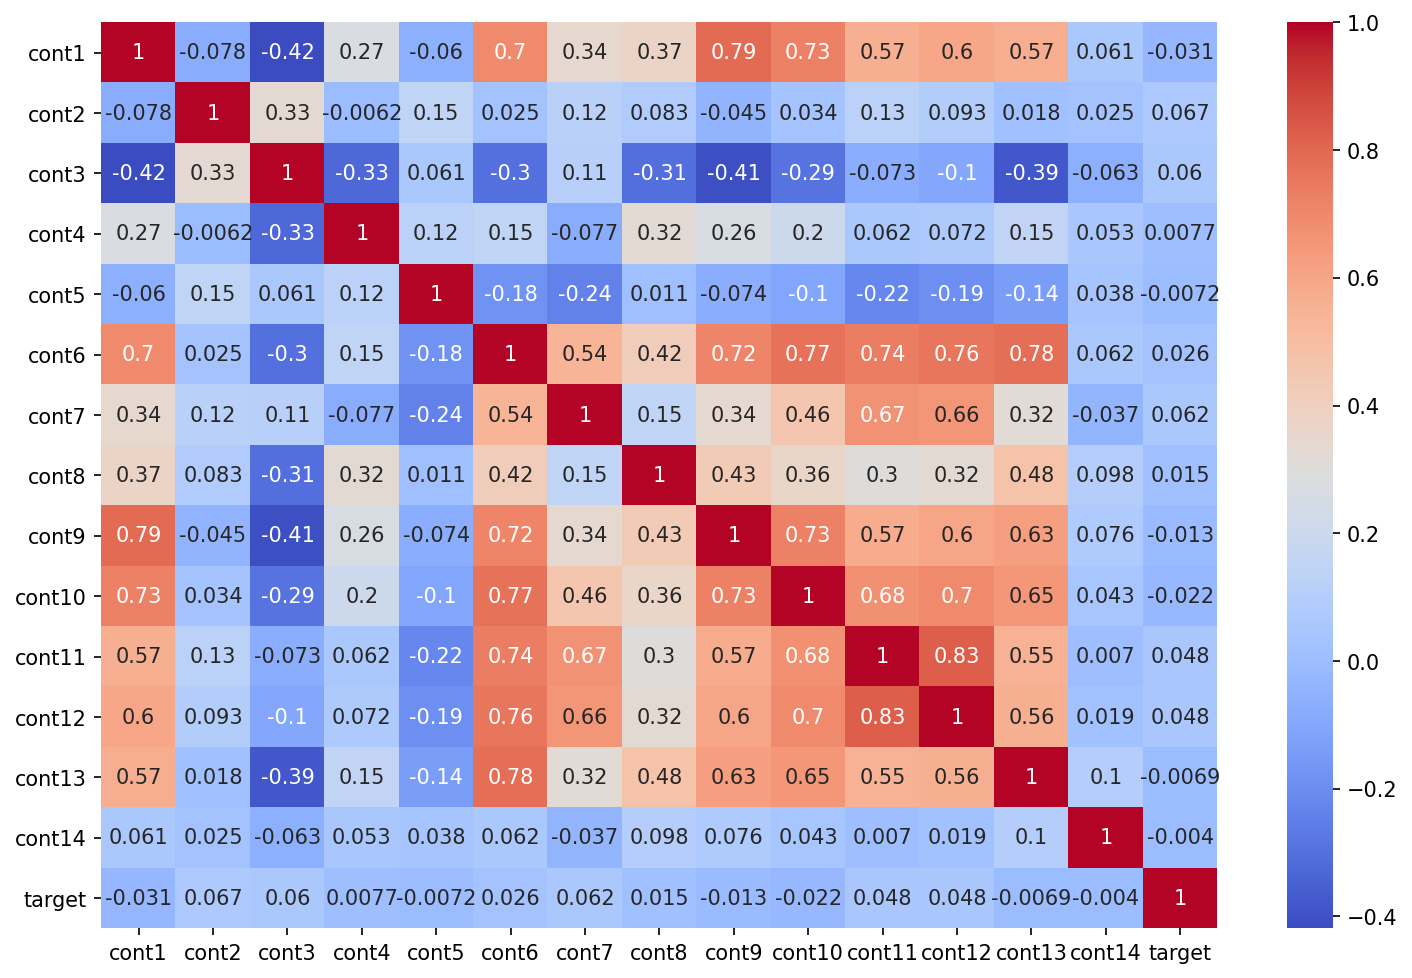

In [18]:
fig, ax = plt.subplots(figsize=(12,8), dpi=150)
sns.heatmap(train_df.drop('id',axis=1).corr(), annot=True, ax=ax, cmap='coolwarm')

<AxesSubplot:xlabel='cont11', ylabel='cont12'>

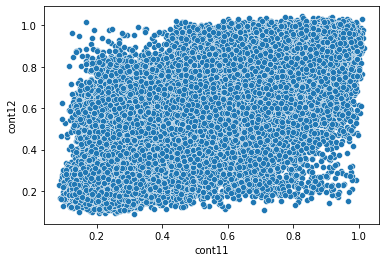

In [19]:
sns.scatterplot(x='cont11',y='cont12',data=train_df)

<AxesSubplot:xlabel='cont1', ylabel='cont9'>

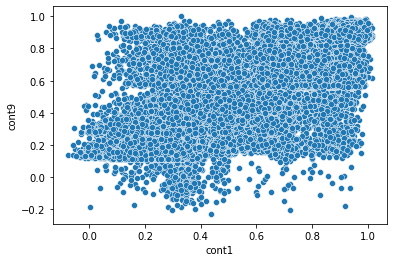

In [20]:
sns.scatterplot(x='cont1',y='cont9',data=train_df)

<AxesSubplot:xlabel='cont6', ylabel='cont13'>

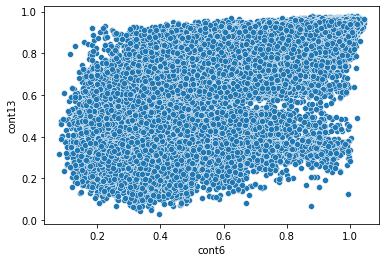

In [21]:
sns.scatterplot(x='cont6',y='cont13',data=train_df)

In [22]:
corr_with_target = train_df.corr()['target'].sort_values(ascending=False)[1:]
corr_with_target = corr_with_target.drop('id')

In [23]:
import matplotlib as mpl

In [24]:
colors = list(reversed(px.colors.qualitative.Dark24))
#colors = list(reversed(['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']))

fig = go.Figure(go.Bar(
    x = corr_with_target.values,
    y = corr_with_target.index,
    text = corr_with_target.values,
    textposition ="auto",
    texttemplate = "%{value:,s}",
    marker_color = colors,
    orientation = "h",
))
fig.update_traces(
    #marker_line_color = "black",
    marker_line_width = 1,
    opacity = 0.8,
)
fig.update_layout(
    title = "Features Correlation to the Target Column"
)
fig.show()

As always we should check for multicollinearity. In this case we can try to use regularization methods like Ridge and Lasso or ElasticNet).

#### Spearman’s Correlation

<AxesSubplot:>

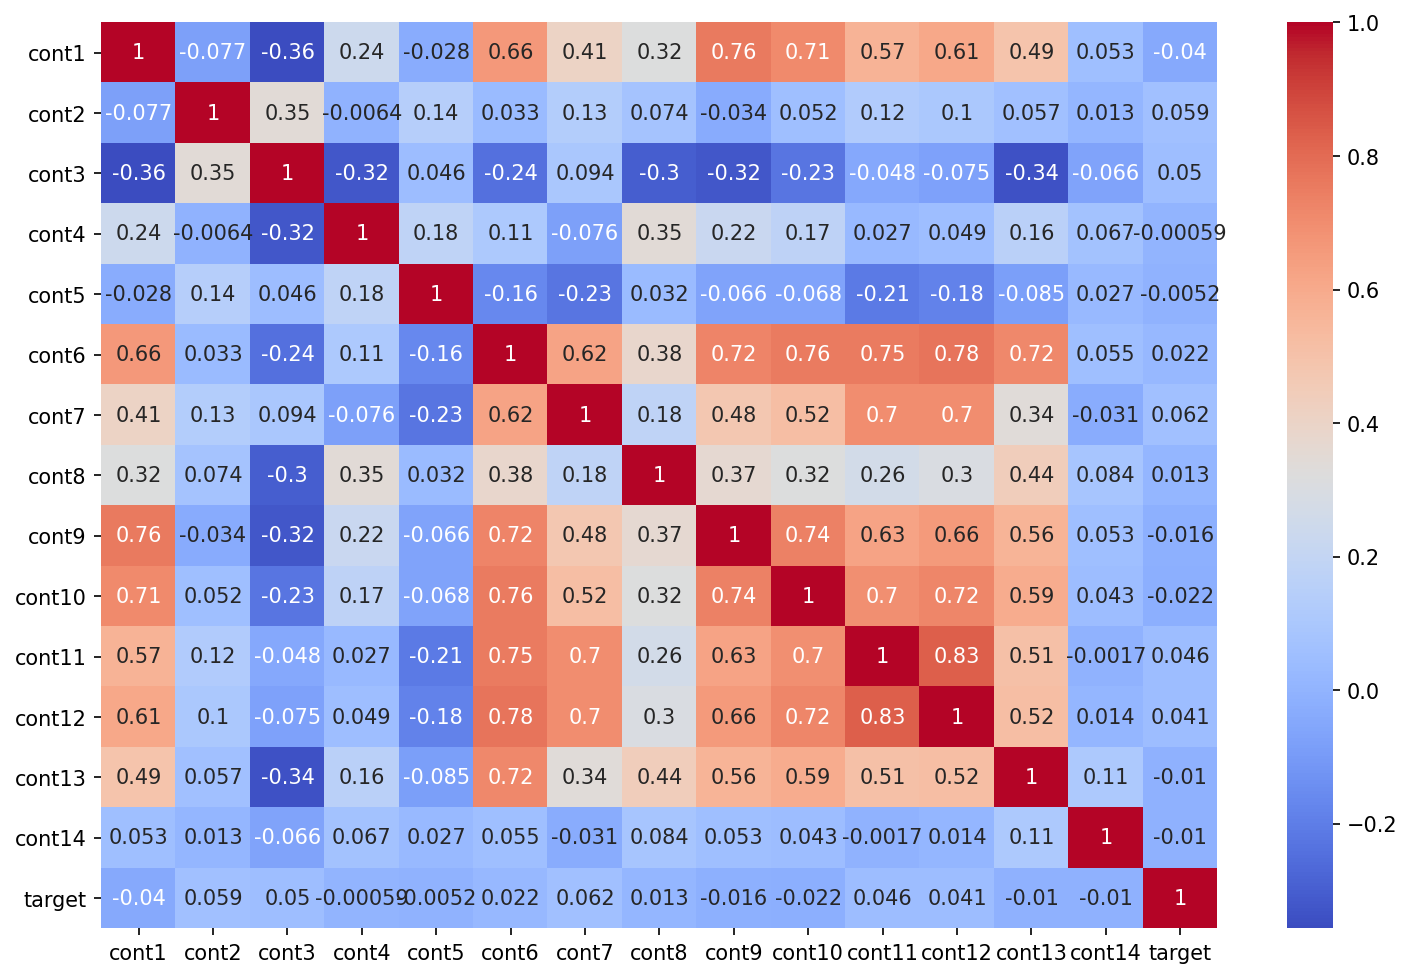

In [25]:
fig, ax = plt.subplots(figsize=(12,8), dpi=150)
sns.heatmap(train_df.drop('id',axis=1).corr(method='spearman'), annot=True, ax=ax, cmap='coolwarm')

A common aproach for highly correlated features is to do dimension reduction

### Normalize data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = train_df.drop(['target','id'], axis=1).values
y = train_df['target'].values
test = test_df.drop("id", axis=1).values
id_col = test_df['id'].values

In [28]:
sc = StandardScaler()
scaled_train = sc.fit_transform(X)
scaled_train = pd.DataFrame(scaled_train, columns=train_df.drop(['target','id'], axis=1).columns)

scaled_test = sc.transform(test)
scaled_test = pd.DataFrame(scaled_test, columns=test_df.drop("id", axis=1).columns)

In [29]:
def evaluateModel(model):
    """
    This function evaluate the model with
    mean absolute error and root mean squared error
    """
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    return mae, rmse

### Split the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

## Linear regression

Linear Regression can not work on all datasets. For a linear regression algorithm to work properly, it has to pass at least the following five assumptions:

1. Linear relationship - the relation between independent and dependent features should be linear. Scatter plot is a good way to visualize it.
2. Multiviariate Normal - each variable seperatly needs to be bell shape curve. This can be tested by plotting a histogram.
3. No Multicollinearity - Multicollinearity happens when the independent variables are highly correlated with each other. Can be tested with correlation matrix.
4. No Autocorrelation - Autocorrelation means a single column data values are related to each other. Test it with scatterplot.
5. Homoscedasticity - This means “same variance” .In other words residuals are equal across regression line. Homoscedasticity can also be tested using scatter plot.

 ### ElasticNet CV

In [32]:
from sklearn.linear_model import ElasticNetCV

In [33]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], tol=0.01)

elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [34]:
elastic_model.l1_ratio_

1.0

For l1_ratio = 0 the penalty is an L2 penalty(Ridge). For l1_ratio = 1 it is an L1 penalty(Lasso). It looks like Lasso will be better model to choose for.

### Lasso CV

In [35]:
from sklearn.linear_model import LassoCV

In [36]:
lassoCV_model = LassoCV(eps=0.01, n_alphas=100,cv=10)

In [37]:
lassoCV_model.fit(X_train, y_train)

LassoCV(cv=10, eps=0.01)

In [38]:
lassoCV_model.alpha_

0.0004874457401457399

In [39]:
lassoCV_model.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 10,
 'eps': 0.01,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': False,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [40]:
val_pred = lassoCV_model.predict(X_test)

#### Evaluate model

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
lasso_mae = mean_absolute_error(y_test, val_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, val_pred))

In [43]:
# mean absolute error
lasso_mae

0.6175684339753004

In [44]:
# Mean of target column
train_df['target'].mean()

7.906702610524086

In [45]:
# root mean squared error
lasso_rmse

0.7308206898564467

#### Residuals

In [46]:
residuals = pd.Series(y_test - val_pred,name='residuals')

In [47]:
residuals

0        0.515995
1       -0.282058
2        0.613375
3       -0.784921
4        0.415743
           ...   
35995    1.286391
35996   -0.950326
35997   -1.139478
35998    0.525526
35999   -0.465520
Name: residuals, Length: 36000, dtype: float64

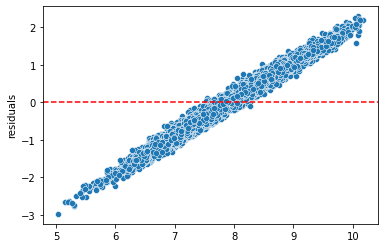

In [48]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', ls='--')

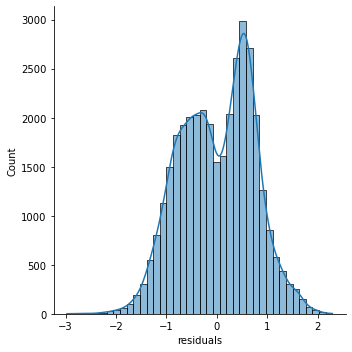

In [49]:
sns.displot(data=residuals, bins=40, kde=True)

In [50]:
import scipy as sp

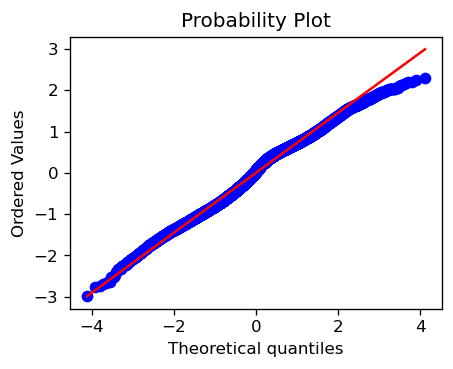

In [51]:
fig, ax = plt.subplots(figsize=(4,3), dpi=120)

_ = sp.stats.probplot(residuals, plot=ax)

#### Feature importance

In [52]:
lassoCV_model.coef_

array([-0.04345069,  0.03106776,  0.01623245,  0.02834978,  0.        ,
        0.06592814,  0.02165264,  0.00963404,  0.00126999, -0.0772468 ,
        0.02229521,  0.03850995, -0.02512718, -0.00262408])

In [53]:
coef_ser = pd.Series(lassoCV_model.coef_)
coef_ser = coef_ser.sort_values(ascending=False)

In [54]:
colors = list(reversed(px.colors.qualitative.Dark24))

fig = go.Figure(go.Bar(
    x = scaled_train.columns,
    y = coef_ser,
    text = coef_ser,
    textposition = 'auto',
    texttemplate = '%{value:,s}',
    marker_color = colors,
    orientation = 'v',
))
fig.update_traces(
    marker_line_width = 1,
    opacity = 0.8,
)
fig.update_layout(
    title = "Feature importances via coefficients in LassoCV"
)
fig.show()

In [55]:
# Let's check if our model is the best model

### Ridge CV

In [56]:
from sklearn.linear_model import RidgeCV

In [57]:
ridgeCV_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error', cv=10)

In [58]:
ridgeCV_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10,
        scoring='neg_mean_absolute_error')

In [59]:
ridgeCV_model.alpha_

0.1

In [60]:
ridgeCV_model.get_params()

{'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 10,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': 'neg_mean_absolute_error',
 'store_cv_values': False}

#### Evaluate model

In [61]:
ridge_pred = ridgeCV_model.predict(X_test)

In [62]:
ridge_mea = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

In [63]:
ridge_mea

0.6174876946407344

In [64]:
ridge_rmse

0.7308073437830608

In [65]:
ridgeCV_model.coef_

array([-4.58610446e-02,  3.13075488e-02,  1.64616793e-02,  2.90192329e-02,
        8.98124030e-05,  6.89926845e-02,  2.15223804e-02,  1.02155276e-02,
        3.78802626e-03, -7.94709082e-02,  2.27341704e-02,  3.89906832e-02,
       -2.74805592e-02, -3.11658050e-03])

#### Residuals

In [66]:
residuals_ridge = pd.Series(y_test - ridge_pred, name='residuals')
residuals_ridge

0        0.516281
1       -0.280279
2        0.618144
3       -0.783949
4        0.421400
           ...   
35995    1.284569
35996   -0.950459
35997   -1.133766
35998    0.525886
35999   -0.462016
Name: residuals, Length: 36000, dtype: float64

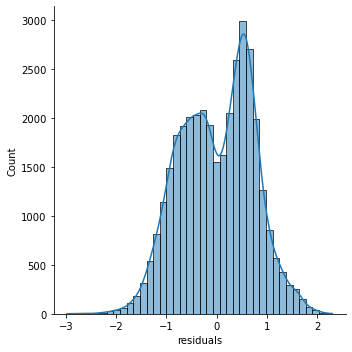

In [67]:
sns.displot(data=residuals_ridge, bins=40, kde=True)

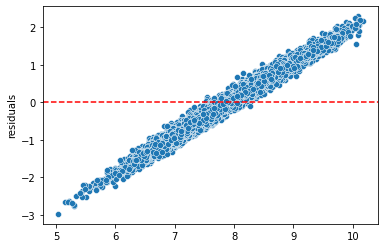

In [68]:
sns.scatterplot(x=y_test, y=residuals_ridge)
plt.axhline(y=0, color='red',ls='--')

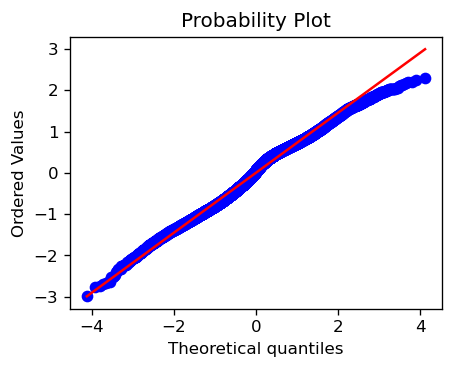

In [69]:
fig, ax = plt.subplots(figsize=(4,3), dpi=120)

_ = sp.stats.probplot(residuals_ridge, plot=ax)

#### Feature importance

In [70]:
coef_ser = pd.Series(ridgeCV_model.coef_)
coef_ser = coef_ser.sort_values(ascending=False)

In [71]:
colors = list(reversed(px.colors.qualitative.Dark24))

fig = go.Figure(go.Bar(
    x = scaled_train.columns,
    y = coef_ser,
    text = coef_ser,
    textposition = 'auto',
    texttemplate = '%{value:,s}',
    marker_color = colors,
    orientation = 'v',
))
fig.update_traces(
    marker_line_width = 1,
    opacity = 0.8,
)
fig.update_layout(
    title = "Feature importances via coefficients in RidgeCV"
)
fig.show()

### SVM model

In [72]:
from sklearn.svm import LinearSVR

In [73]:
svr_model = LinearSVR(max_iter=1000000)

In [74]:
svr_model.fit(X_train, y_train)

LinearSVR(max_iter=1000000)

In [75]:
svr_model.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

#### Evaluate model

In [76]:
svr_pred = svr_model.predict(X_test)

In [77]:
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))

In [78]:
svr_mae

0.6156651369763363

In [79]:
svr_rmse

0.7330275947623143

#### Residuals

In [80]:
residuals_svr = pd.Series(y_test - svr_pred,name=' LinearSVC residuals')
residuals_svr

0        0.484058
1       -0.251213
2        0.586754
3       -0.819615
4        0.466908
           ...   
35995    1.183281
35996   -1.027627
35997   -1.142978
35998    0.520149
35999   -0.473386
Name:  LinearSVC residuals, Length: 36000, dtype: float64

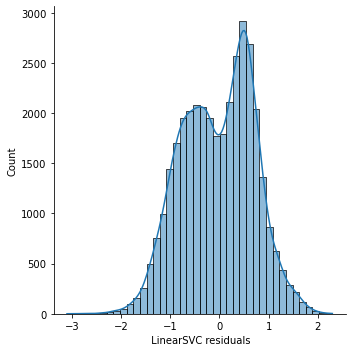

In [81]:
sns.displot(data=residuals_svr, bins=40,kde=True)

Text(0.5, 0, 'y_actual')

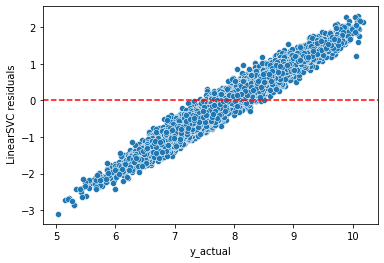

In [82]:
sns.scatterplot(x=y_test, y=residuals_svr)
plt.axhline(y=0, color='red',ls='--')
plt.xlabel("y_actual")

It seems like this data set is not valid for linear regression.(If someone correct me if I am wrong). In other words if residuals plot shows clear pattern, Linear Regression is propably not a good choice.

There is constant error between residuals and actual data which leads us to very sophisticated term  homoscesdasticity, the word I still struggle to pronounce it :).

Text(0.5, 1.0, 'Probability plot')

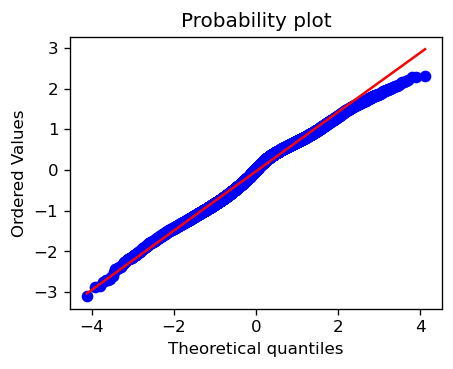

In [83]:
fig, ax = plt.subplots(figsize=(4,3), dpi=120)

_ = sp.stats.probplot(residuals_svr, plot=ax)

plt.title("Probability plot")

There is an issue with dataset because residuals are skewing from linear regression line.

#### Feature importance

In [84]:
svr_model.coef_

array([-0.06166782,  0.05494291,  0.02599443,  0.03162106,  0.00713163,
        0.11889426,  0.03565957,  0.01462656,  0.01774319, -0.11967545,
        0.00715927,  0.04918964, -0.03037001, -0.00871391])

In [85]:
coef_ser = pd.Series(svr_model.coef_)
coef_ser = coef_ser.sort_values(ascending=False)

In [86]:
colors = list(reversed(px.colors.qualitative.Dark24))

fig = go.Figure(go.Bar(
    x = scaled_train.columns,
    y = coef_ser,
    text = coef_ser,
    textposition = 'auto',
    texttemplate = '%{value:,s}',
    marker_color = colors,
    orientation = 'v',
))
fig.update_traces(
    marker_line_width = 1,
    opacity = 0.8,
)
fig.update_layout(
    title = "Feature importances via coefficients in LinearSVR"
)
fig.show()

### Training final models

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# lasso_model = Lasso(alpha=lassoCV_model.alpha_).fit(scaled_train, y)

In [ ]:
# ridge_model = Ridge(alpha=ridgeCV_model.alpha_).fit(scaled_train, y)

In [ ]:
# linearSVR_model = LinearSVR(max_iter=1000000).fit(scaled_train, y)

### Make predictions and save it.

In [ ]:
# lasso_sub = pd.DataFrame(data={'id': id_col,'target':lasso_model.predict(scaled_test)})

# ridge_sub = pd.DataFrame(data={'id':id_col, 'target':ridge_model.predict(scaled_test)})

# linearSVR_sub = pd.DataFrame(data={'id':id_col, 'target': linearSVR_model.predict(scaled_test)})


# print(len(lasso_sub['id']) == len(sample_sub['id']))
# print(len(ridge_sub['id']) == len(sample_sub['id']))
# print(len(linearSVR_sub['id']) == len(sample_sub['id']))

In [ ]:
# lasso_sub.to_csv("submission_lasso.csv", index=False)
# ridge_sub.to_csv("submission_ridge.csv", index=False)
# linearSVR_sub.to_csv("submission_linearSVR.csv")

### Search for the best hyperparameters

In [ ]:
lasso_model = Lasso(max_iter=1000000)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 0.1, 0.5, 1, 10, 100]}

lasso_grid = GridSearchCV(lasso_model,param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

In [ ]:
lasso_grid.best_params_

In [ ]:
abs(lasso_grid.best_score_)

In [ ]:
lasso_y_grid = lasso_grid.predict(X_test)

In [ ]:
lasso_grid_mae = mean_absolute_error(y_test, lasso_y_grid)

In [ ]:
lasso_grid_mae

In [ ]:
lasso__grid_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_grid))

In [ ]:
lasso__grid_rmse

### Best Lasso Submission

In [ ]:
best_lasso_model = Lasso(alpha=0.005)

In [ ]:
best_lasso_model.fit(X_train, y_train)

In [ ]:
best_lasso_y_pred = best_lasso_model.predict(X_test)

In [ ]:
best_lasso_mae = mean_absolute_error(y_test, best_lasso_y_pred)
best_lasso_rmse = np.sqrt(mean_squared_error(y_test, best_lasso_y_pred))

In [ ]:
best_lasso_mae

In [ ]:
best_lasso_rmse

In [ ]:
# Submmit to Kaggle

In [ ]:
# final_best_lasso = Lasso(alpha=0.005)

In [ ]:
# final_best_lasso.fit(scaled_train, y)

In [ ]:
# best_lasso_sub = pd.DataFrame({'id': id_col,'target': final_best_lasso.predict(scaled_test)})

In [ ]:
# best_lasso_sub.to_csv("submission_best_lasso.csv", index=False)

### GridSearch CV for Ridge Regression

In [ ]:
best_ridge_model = Ridge(max_iter=1000000)

In [ ]:
param_grid = {'alpha':[0.01, 0.05, 0.1, 1.0, 10.0],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'saga']}

In [ ]:
grid_ridge = GridSearchCV(best_ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_ridge.fit(X_train, y_train)

In [ ]:
grid_ridge.best_params_

In [ ]:
abs(grid_ridge.best_score_)

In [ ]:
ridge_grid_pred = grid_ridge.predict(X_test)

In [ ]:
ridge_grid_mae = mean_absolute_error(y_test, ridge_grid_pred)
ridge_grid_rmse = np.sqrt(mean_squared_error(y_test, ridge_grid_pred))

In [ ]:
ridge_grid_mae

In [ ]:
ridge_grid_rmse

In [ ]:
# No Submmission here

### Polynomial Regression

I resized training set earlier in the notebook in order to perform polynomial regression, if I test with degree higher than 3 my computer memory will crash my comp.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)
    
X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_pred = poly_reg_model.predict(X_test)

poly_mae = mean_absolute_error(y_test, poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))


In [ ]:
poly_mae

In [ ]:
poly_rmse

#### Submmit to Kaggle

In [ ]:
# full_poly_reg = LinearRegression()
# full_poly_reg.fit(poly_features, y)

In [ ]:
# poly_test_features = poly_converter.transform(test)

In [ ]:
# poly_sub = pd.DataFrame({'id': id_col,'target': full_poly_reg.predict(poly_test_features)})

In [ ]:
# poly_sub.to_csv("submission_poly.csv", index=False)

### GridSearch CV for SVR

This will takes ages in my computer to find the right hyperparameters. Searching for best parameters can be exhausting and in some cases can break down. So, purely because of the time needed for gridsearch and memory I create smaller datasets to reduce computing time. I will also search only for C values in this case 

In [ ]:
# from sklearn.svm import SVR

In [ ]:
# svr_model = SVR()

In [ ]:
# param_grid = {'C':[0.001, 0.1, 1, 10]}

In [ ]:
# grid_svr = GridSearchCV(svr_model, param_grid, cv=2,verbose=1)

In [ ]:
# grid_svr.fit(X_train, y_train)

In [ ]:
# grid_svr_pred = grid_svr.predict(X_test)

In [ ]:
# grid_svr_mae = mean_absolute_error(y_test, grid_svr_pred)

In [ ]:
# grid_svr_rmse = np.sqrt(mean_squared_error(y_test, grid_svr_pred))

In [ ]:
# grid_svr_mae

In [ ]:
# grid_svr_rmse

### Gradient Descent Algorithm for Regression 

I found out that linear regression algorithms are not suited for this dataset, and there is little improvement in rmse for these models. I also find out that algorithms using loss function are performing better, therefore I try XGBoost. The algorithm is an implementation of the gradient boosting ensemble algorithm for classification and regression.

In [ ]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor

sgdr_model = SGDRegressor()

In [ ]:
sgdr_model.fit(X_train, y_train)

In [ ]:
sgdr_mae, sgdr_rmse = evaluateModel(sgdr_model)

In [ ]:
# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=50)
knn_regressor.fit(X_train, y_train)

In [ ]:
knn_mae, knn_rmse = evaluateModel(knn_regressor)

#### Griedient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gr_boost_reg = GradientBoostingRegressor(n_estimators=200)

In [ ]:
gr_boost_reg.fit(X_train, y_train)

In [ ]:
gbr_mae, gbr_rmse = evaluateModel(gr_boost_reg)

This looks promising, let's tune hyperparameters and check if that improve our results.

In [ ]:
# GridSearch CV

In [ ]:
gr_boost_reg = GradientBoostingRegressor()

In [ ]:
param_grid = {"n_estimators":[300,1000], # previously [10,100,200,300]
              "learning_rate":[0.01, 0.1, 1.0],
              "loss":["ls","huber"],
              "max_features":["auto","sqrt","log2"]}

In [ ]:
grid_gbr = GridSearchCV(gr_boost_reg, param_grid,cv=2,verbose=1)

In [ ]:
grid_gbr.fit(X_train, y_train)

In [ ]:
grid_gbr.best_params_

In [ ]:
grid_gbr.best_score_

In [ ]:
gbr_y_pred = grid_gbr.predict(X_test)

In [ ]:
gbr_mae, gbr_rmse = evaluateModel(grid_gbr)

#### Submmit to Kaggle

In [ ]:
# full_data_gbr = GradientBoostingRegressor(n_estimators=1000,
                                          # learning_rate=0.1,
                                          # loss="ls",
                                          # max_features='sqrt')

In [ ]:
# full_data_gbr.fit(scaled_train, y)

In [ ]:
# gbr_sub = pd.DataFrame({"id":id_col,"target":full_data_gbr.predict(scaled_test)})

In [ ]:
# gbr_sub.to_csv("submission_gbr.csv", index=False)

Submission scored 0.70774, which gave 727 from 1049 position in the scoreboard on 19.01.2020. Not bad, Let's se if we can tune it better with slightly different hyperparameters.

1. MAE: 0.5956168406066421
2. RMSE: 0.7110476866137042


Hyperparameters found by GridSearch CV:

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 300}

Submission scored 0.70565, which is an improvement of your previous score of 0.70774. More tunning yielded small improvment and placed on scoreboard 706.

Hyperparameters:

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_features': 'sqrt',
 'n_estimators': 1000}
 
Score:

1. MAE: 0.5937034963056688
2. RMSE: 0.7088659238713398

Good practice is to check for Variance-Bias Trade-Off by tunning in this case "n_estimators" hyperparameter and keep record of rmse for test and train test. This algorithm is fairly robust to overfitting so a large number usually results with better performance.

One popular rank correlation method in ML is the Principal Component Analysis. It’s a technique to find patterns in high dimensional data.

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc_model = RandomForestRegressor()

In [ ]:
rfc_model.fit(X_train, y_train)

In [ ]:
evaluateModel(rfc_model)

In [ ]:
rfc_model.feature_importances_

In [ ]:
coef_ser = pd.Series(rfc_model.feature_importances_)
coef_ser = coef_ser.sort_values(ascending=False)

In [ ]:
colors = list(reversed(px.colors.qualitative.Dark24))

fig = go.Figure(go.Bar(
    x = scaled_train.columns,
    y = coef_ser.values,
    text = coef_ser.values,
    textposition = 'auto',
    texttemplate = '%{value:,s}',
    marker_color = colors,
    orientation = 'v',
))
fig.update_traces(
    marker_line_width = 1,
    opacity = 0.8,
)
fig.update_layout(
    title = "Feature importances via coefficients in LassoCV"
)
fig.show()

#### GridSearch CV fro RandomForestRegresor

In [ ]:
rfr_model = RandomForestRegressor()

In [ ]:
param_grid = {"n_estimators":[300, 500, 1000],
              "max_depth":[2,3,5],
              "max_features":["auto","sqrt","log2"]}

In [ ]:
grid_rfr = GridSearchCV(rfr_model,param_grid, cv=2, verbose=1)

In [ ]:
grid_rfr.fit(X_train, y_train)

In [ ]:
rfr_mae, rfr_rmse = evaluateModel(grid_rfr)

In [ ]:
# No improvements with this algorithm.

### Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
ann_model = Sequential()


# input layer
ann_model.add(Dense(78, activation='relu', dtype='float32'))

# hidden layer
ann_model.add(Dense(78, activation='relu', dtype='float32'))
ann_model.add(Dropout(0.5))

# hidden layer
ann_model.add(Dense(38, activation='relu', dtype='float32'))
ann_model.add(Dropout(0.5))

# hidden layer
ann_model.add(Dense(19, activation='relu',dtype='float32'))
ann_model.add(Dropout(0.5))

# output layer
ann_model.add(Dense(1, activation='relu', dtype='float32'))

ann_model.compile(optimizer='adam', loss='mae')  # rmsprop, adam

In [ ]:
ann_model.fit(x=X_train, y=y_train,
              validation_data=(X_test, y_test),
              batch_size=64, epochs=15,verbose=0)

In [ ]:
losses = pd.DataFrame(ann_model.history.history)

In [ ]:
losses.plot()

#### Evaluate the model

In [ ]:
# ann_model_pred = ann_model.predict(X_test)

In [ ]:
ann_mae, ann_rmse = evaluateModel(ann_model)

I bolive there is still a room for improvement by better parameters tunning but this is not the purpose of this notebook, but for now my winner so far is Griedient Boosting Regressor. Finally, I would like to try last algorythm which is XGBoost.


XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

In [ ]:
import xgboost as xgb

In [ ]:
data_dmatrix = xgb.DMatrix(data=scaled_train,
                           label=y)

In [ ]:
data_dmatrix

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)

In [ ]:
xg_reg.fit(X_train, y_train)

In [ ]:
xgb_mae, xgb_rmse = evaluateModel(xg_reg)

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### Submmit to Kaggle

In [ ]:
# xgb_final = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                # max_depth = 5, alpha = 10, n_estimators = 500)

In [ ]:
# xgb_final.fit(scaled_train.values,y)

In [ ]:
# xgb_pred = xgb_final.predict(scaled_test.values)

In [ ]:
# xgb_sub = pd.DataFrame({"id":id_col, "target":xgb_pred})

In [ ]:
# xgb_sub.to_csv("submission_xgboost.csv", index=False)

This is great. Submission scored 0.70400, which is an improvement of your previous score of 0.70565.
654 position on Kaggle scoreboard on 20.01.2020. Let's see if we can tune our model and get better results.

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.describe().T

#### XGBoost tunning hyperparameters

In [ ]:
xgb1 = xgb.XGBRegressor()

In [ ]:
param_grid = {# 'nthread':[1], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              # 'max_depth': [5, 6, 7],
              'alpha':[0.1, 1, 10],
              'colsample_bytree': [0.3, 0.7],
              'n_estimators': [500, 1000]}

In [ ]:
xgb_grid = GridSearchCV(xgb1, param_grid, cv=2, verbose=1)

In [ ]:
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid_mae , xgb_grid_rmse = evaluateModel(xgb_grid)

In [ ]:
xgb_grid.best_params_

In [ ]:
best_xgb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.03, colsample_bytree=0.3, alpha=10)

In [ ]:
best_xgb.fit(scaled_train, y)

In [ ]:
xgb2_sub = pd.DataFrame({"id": id_col,
                         "target": best_xgb.predict(scaled_test)})

In [ ]:
xgb2_sub.to_csv("submission_xgb2.csv", index=False)

Submission scored 0.70303, which is an improvement of your previous score of 0.70400. Position on the scoreboard 628.

### Table with models and their score

In [ ]:
# Table containing all results if I run this notbook again

## Conclusion

It seems to me that in this particular dataset gradient boosting algorithms performe much better than linear models. I also realize that there might be more improvement if you go deeper into hyperparameters and tune chosen model. Another suggestion could be dealing with correlated data. One popular rank correlation method in ML is the Principal Component Analysis. It’s a technique to find patterns in high dimensional data.

I am sure there is more to explore to make predictions which would result with lower RMSE, but it is beyond my scope yet. There is still so much to learn...

So, as for myself the question remains "What else I could do to improve model score?. Any suggestion, please leave feedback.

I hope you find this notebook interesting, feedback is more than welcome.